# Basic API Client Usage

### Install package

In [1]:
#!pip install atomicds

### API Client Setup

In [4]:
from atomicds.client import Client
from atomicds.results import RHEEDImageCollection

from datetime import datetime
import networkx as nx
import matplotlib as plt

To get an API key to run this example, go to Account Management from your profile.

In [3]:
api_key = "YOUR_API_KEY_HERE"
client = Client(api_key=api_key)

### Uploading Data

Uploading local files can be done with the `upload` method as shown below. 

This will also kick off analysis automatically. Data is visible in the platform immediately.

In [ ]:
files = ["example/RHEED1.mp4", "example/RHEED2.imm"]
client.upload(files=files)

### Searching Data

Below are examples illustrating different ways to search through data catalogue items with the API.

There may be more options than what is here. Refer to the docs (https://atomic-data-sciences.github.io/api-client/) for more details.

In [4]:
# Keyword searching - any keywords in any data catalogue field
results = client.search(keywords=["WSe2"])

# Limit To Personal - option to limit search results to personal uploads
results = client.search(include_organization_data=False)

# Data IDs - main ID automatically assigned to the data on upload
results = client.search(data_ids=["44fa63b0-74da-4d25-a362-2276c80a670a"])

# Data Type -- 'all', 'rheed_image', 'rheed_stationary', 'rheed_rotating', 'xps', etc...
results = client.search(data_type="all")

# Status - 'all, 'success', 'pending', 'error', 'running'
results = client.search(status="all")

# Growth Length - min and max length of the growth in seconds, with None meaning no bound
results = client.search(growth_length=(3000, None))

# Upload Datetime - min and max upload datetime of the growth, with None meaning no bound
max_datetime = datetime.strptime('01-04-2025', '%d-%m-%Y')
results = client.search(upload_datetime=(None, max_datetime))

### Search Results

Search results are returned as rows in a pandas `Dataframe` object with the following columns:
```
['Data ID', 'Upload Datetime', 'Last Accessed Datetime', 'File Metadata',
'Type', 'File Name', 'Status', 'File Type', 'Instrument Source',
'Sample Name', 'Growth Length', 'Tags', 'Owner', 'Physical Sample ID',
'Physical Sample Name', 'Sample Notes', 'Sample Notes Last Updated']
```

In [5]:
results = client.search(keywords=["demo"], data_type="rheed_stationary", include_organization_data=False)
results

,Data ID,Upload Datetime,Last Accessed Datetime,File Metadata,Type,File Name,Status,File Type,Instrument Source,Sample Name,Growth Length,Tags,Owner,Physical Sample ID,Physical Sample Name,Sample Notes,Sample Notes Last Updated
0,6a921282-4c11-485b-8c70-75529a9936f6,2025-02-12 21:28:35.738882,2025-02-12 21:36:09.655542,"{'dims': [150, 319, 484], 'width': 0, 'frames'...",rheed_stationary,RHEED Stream @ 4:28pm,success,.avi,None,None,-,None,Jason Munro,None,None,Agent Demo V2\n,2025-02-12 21:36:09.664756
1,df6381a9-0380-42ad-8eac-65099076565b,2023-10-23 02:57:24.315666,2025-02-27 15:03:33.250262,"{'dims': [4116, 494, 566], 'width': 566, 'fram...",rheed_stationary,demo_heterostructure_growth (LFO-LAO).mp4,success,.mp4,None,None,0 days 00:34:18,None,Jason Munro,None,None,None,NaT


### Analysis Results

Individual data item analysis results can be obtained using data IDs from a search, or from the web interface.

In [6]:
analyzed = client.get(results["Data ID"].to_list())

Obtaining data results:   0%|          | 0/2 [00:00<?, ?it/s]

Let's pull a single RHEED video analysis item and look at some of the data...

In [7]:
video_item = analyzed[0]
video_item.timeseries_data

Time  Specular Intensity  \
Angle         Frame Number                                  
Seed Frame 6) 6              0.200053            0.417385   
              20             0.666844            0.417385   
              34             1.133636            0.417385   
              48             1.600427            0.417385   
              62             2.067218            0.417012   
...                               ...                 ...   
              2900          96.719167            0.379578   
              2920          97.385333            0.380351   
              2940          98.051500            0.380351   
              2960          98.717667            0.380812   
              2980          99.383833            0.380755   

                            First Order Intensity    Strain  \
Angle         Frame Number                                    
Seed Frame 6) 6                          0.363062  0.000000   
              20                         0.363062  0.000195   
              34                         0.363062  0.000195   
              48                         0.363062  0.000171   
              62                         0.363062 -0.003067   
...                                           ...       ...   
              2900                       0.345762 -0.548904   
              2920                       0.338220 -0.549462   
              2940                       0.338220 -0.549282   
              2960                       0.338220 -0.549326   
              2980                       0.338220 -0.549666   

                            Cumulative Strain  Oscillation Period  \
Angle         Frame Number                                          
Seed Frame 6) 6                      0.000000                 0.0   
              20                     0.000195                 0.0   
              34                     0.000000                 0.0   
              48                    -0.000024                 0.0   
              62                    -0.003237                 0.0   
...                                       ...                 ...   
              2900                  -0.000031                 0.0   
              2920                  -0.001236                 0.0   
              2940                   0.000399                 0.0   
              2960                  -0.000098                 0.0   
              2980                  -0.000754                 0.0   

                            Diffraction Spot Count  Lattice Spacing  
Angle         Frame Number                                           
Seed Frame 6) 6                                  5         1.007952  
              20                                 5         1.007755  
              34                                 5         1.007755  
              48                                 5         1.007779  
              62                                 4         1.011052  
...                                            ...              ...  
              2900                              20         2.246313  
              2920                              22         2.249093  
              2940                              22         2.248195  
              2960                              22         2.248415  
              2980                              22         2.250113  

[159 rows x 8 columns]

Extracted frame image and segmentation mask

In [15]:
extracted_frame = video_item.snapshot_image_data[0]

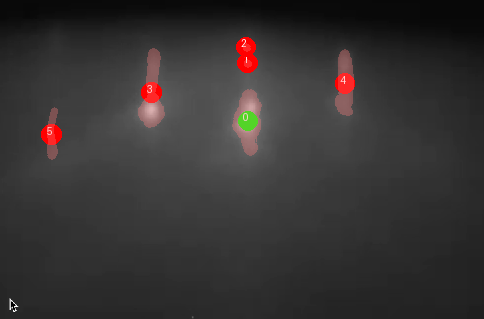

In [16]:
extracted_frame.get_plot()

NetworkX graph object and RHEED fingerprint data

MultiGraph with 6 nodes and 5 edges


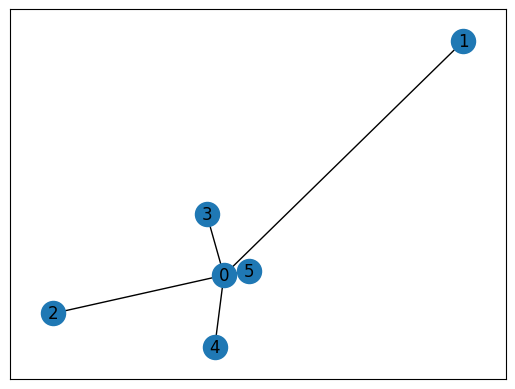

In [17]:
pattern_network = extracted_frame.pattern_graph
print(pattern_network)
nx.draw_networkx(pattern_network)

In [18]:
extracted_frame.get_pattern_dataframe()

,node_id,centroid_0,centroid_1,specular_origin_0,specular_origin_1,relative_centroid_0,relative_centroid_1,intensity_centroid_0,intensity_centroid_1,area,...,mask_height,streak_area,eccentricity,bbox_intensity,center_distance,roughness_metric,axis_major_length,axis_minor_length,distances,data_id
0,0,120.774413,247.821347,120.774413,247.821347,0.000000,0.000000,2.225587,-0.321347,1321.0,...,319,517,0.914355,0.521301,0.000000,2.199978,65.761904,26.627896,39.179292,cb12e6ce-469a-491f-9c94-0d40bd30af1a
1,1,63.169811,247.377358,120.774413,247.821347,-57.604602,-0.443989,-53.774413,-0.321347,53.0,...,319,0,0.383525,0.327044,57.606313,1.999900,8.542747,7.889485,77.446765,cb12e6ce-469a-491f-9c94-0d40bd30af1a
2,2,47.173077,246.307692,120.774413,247.821347,-73.601336,-1.513655,-69.774413,-1.821347,52.0,...,319,52,0.398166,0.264103,73.616899,4.999500,8.520817,7.816259,91.352075,cb12e6ce-469a-491f-9c94-0d40bd30af1a
3,3,92.633476,151.613734,120.774413,247.821347,-28.140937,-96.207614,-11.274413,-96.821347,1165.0,...,319,728,0.972915,0.419110,100.238801,0.727266,90.617407,20.947440,69.863769,cb12e6ce-469a-491f-9c94-0d40bd30af1a
4,4,83.627207,344.719626,120.774413,247.821347,-37.147207,96.898279,-18.218858,95.845319,963.0,...,319,758,0.968453,0.295046,103.774715,3.384589,71.578317,17.837149,142.806020,cb12e6ce-469a-491f-9c94-0d40bd30af1a
5,5,134.678744,51.596618,120.774413,247.821347,13.904331,-196.224729,33.825587,-192.821347,414.0,...,319,414,0.984403,0.250185,196.716737,8.799824,59.261583,10.425878,158.446093,cb12e6ce-469a-491f-9c94-0d40bd30af1a


For more information on other data from the API or other example use see notebooks in the code repository (https://github.com/atomic-data-sciences/api-client) and the documentation (https://atomic-data-sciences.github.io/api-client/)

### Download Processed Videos

Individual processed videos can be downloaded as MP4 files obtained using data IDs from a search, or from the web interface.

In [5]:
data_ids = results["Data ID"].to_list()

In [6]:
client.download_videos(data_ids=data_ids, dest_dir="./")

Output()